# PHYS 321 Coding Lab #1: Coordinate Systems

In this coding lab, we begin familiarizing ourselves with the [Astropy](https://www.astropy.org/) Python package and different coordinate systems

## Start with git

If you didn't start there, though, look at the PDF document with the git instructions for this Coding Lab.

## Premable

In [2]:
# Load some python libraries for retrieving remote data
# and for displaying saved image files within a Jupyter notebook
from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image

In [3]:
# Load the relevant parts of astropy 
from astropy import units as u
from astropy.coordinates import SkyCoord

## Retrieving the coordinates of an object and SDSS cutouts

Recall from lecture that one can define an _equatorial_ coordinate system where faraway astronomical objects (i.e., outside of our Solar System) have fixed _right ascension_ $\alpha$ and _declination_ $\delta$ (see this [Sky and Telescope](https://www.skyandtelescope.com/astronomy-resources/right-ascension-declination-celestial-coordinates/) article or [Wikipedia](https://en.wikipedia.org/wiki/Equatorial_coordinate_system) for a refresher). In other words, the RA and DEC of an object are fixed to the distant stars. The coordinates are aligned such that the polar axis ($\delta = 90^\circ$) is aligned with the Earth's spin axis.\*\* (Notice how the *ecliptic*, which is the plane defined by the Earth's _orbit_ around the Sun, is inclined relative to $\delta = 0$). This means that if I stand at some location on Earth and look straight overhead ("at zenith") and observe for an entire day, I trace out a line of constant declination with my observations, and at different times of the day I get to see different right ascensions.

\*\* Actually it's a little bit more subtle than this. We'll dig into the issue a little bit more later today when we talk about transforming between different coordinate systems.

<div>
<img src="images/RA_Dec.png" width="400">
</div>


<center>
    Image credit: Sky & Telescope
</center>

Suppose that one has the name of an astronomical object and one wants to know its RA and DEC. As an example, let's figure out where the coordinates of the center of Abell 2255, a famous galaxy cluster.

In [4]:
Abell2255_center = SkyCoord.from_name('ACO 2255')

This stores the coordinates of the center of Abell 2255 in a SkyCoord object. We can display the actual coordinates simply by printing the object:

In [5]:
print(Abell2255_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (258.2085, 64.05294444)>


To extract the individual $\alpha$ and $\delta$, simply type:

In [6]:
Abell2255_center.ra

<Longitude 258.2085 deg>

In [7]:
Abell2255_center.dec

<Latitude 64.05294444 deg>

Notice how the coordinates are written in degrees, arcminutes, and arcseconds. Sometimes we prefer to express right ascension in terms of hours, because as time goes on and the Earth rotates, we get to see different different right ascensions. There's no need to do the conversion yourself when you're using astropy!

In [8]:
Abell2255_center.ra.hour

17.213900000000006

We need to be careful, though, about what we mean by an "hour". The full range of right ascension $\alpha$ is from $0$ to $24\,\textrm{hr}$. However, this "hour" is not the hour you're used to! Put another way, if I look up at the sky and see an object directly overhead (i.e., at zenith), I will *not* see it directly overhead again if I look $24$ "normal" hours later. Why not?

Answer:
A sidereal day is slightly shorter than what we call a day on Earth. In fact, one sidereal day is 23h 56min 4.1s long. The right ascension follows the sidereal day instead of a "normal day". Therefore, the positions of celestial objects are slightly different in 24 "normal" hours.

Reference: https://scienceworld.wolfram.com/astronomy/SiderealDay.html

Let's get a picture of Abell 2255 from the [Sloan Digital Sky Survey](https://www.sdss.org/). SDSS is a wonderful treasure trove of information. Since the year 2000, SDSS has been systematically taking pictures of the sky in five filters ("colours") and detailed spectra of select interesting objects. The telescope has a $2.5\,\textrm{m}$-wide primary mirror, and is located at Apache Point Observatory in New Mexico, USA (Latitude $32^\circ 46'49.30\!"$N, Longitude $105^\circ 49'13.50\!"$W, Elevation $2788\,\textrm{m}$). SDSS images the sky with an observing strategy that is known as a *drift scan*, where one points the telescope at a fixed angle relative to the ground so that stripes of constant declination are mapped out as the Earth rotates. Here's how we can access SDSS images:

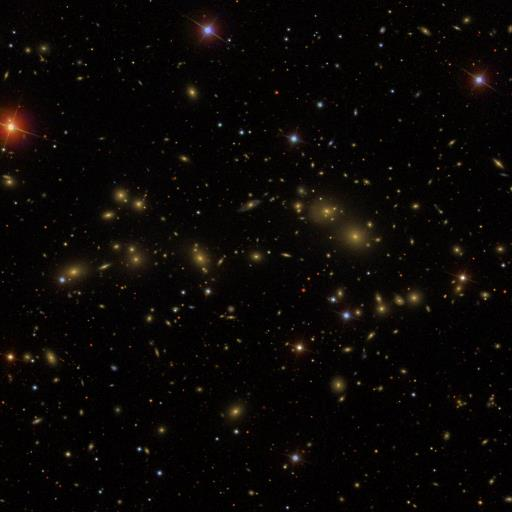

In [9]:
im_size = 12. * u.arcmin # get a 12 arcmin square
im_pixels = 512
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=Abell2255_center.ra.deg,
                              dec=Abell2255_center.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

urlretrieve(url, 'Abell_2255.jpg') # Download the image to your disk
Image(filename='Abell_2255.jpg') # Display the saved image in your Jupyter notebook

Absolutely spectacular. I hope this begins to give you a sense for the vastness of our Universe. Remember that each side of this square is just $1/5$ of a degree ($12\,\textrm{arcminutes}$) across on the sky, and each dot is an entire galaxy in its own right.

Notice the spikes that you see centred on some of the sources (they're most easily seen around some of the sources near the top of the image). What are these?

Answer: 
The spikes are diffraction spikes. Most telescopes have mirrors inside the tube, and they are held in place by thin rods. As light hits the rods, a diffraction pattern can be observed, resulting in the spikes as shown in the image above.

Reference: https://www.wtamu.edu/~cbaird/sq/2015/11/16/why-do-the-spikes-that-shoot-out-of-stars-form-perfect-crosses/

Now's your chance to flex some of those Python muscles that were dormant over winter break! Write some code that creates a series of images mimicking what SDSS sees as the sky drifts through the field of view of the telescope for a short period of time. You'll have to look up the field of view of SDSS. (Bonus: if you have time/interest, stitch together the images into a movie!)

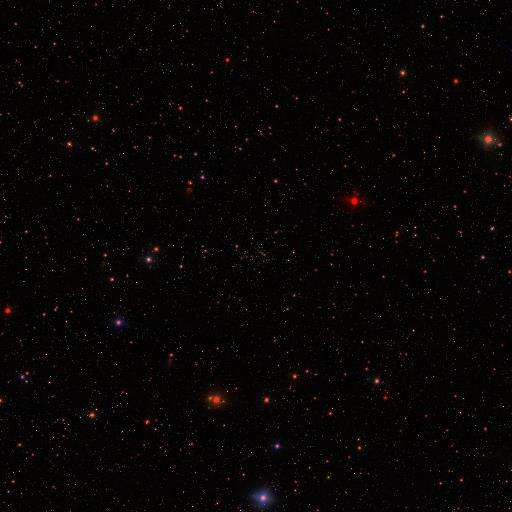

In [10]:
## Your code goes here. Try to practice some good coding habits (e.g., try to avoid hardcoding parameters)
## Hint that may or may not be useful: we can define a SkyCoord object with arbitrary
## RA and DEC by doing something like
## myPoint = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')
## The first number is the RA, and the second number is the DEC.


im_size = 2.5 * u.degree # get a 2.5 degrees square
im_pixels = 512
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=Abell2255_center.ra.deg,
                              dec=Abell2255_center.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

urlretrieve(url, 'Abell_2255.jpg') # Download the image to your disk
Image(filename='Abell_2255.jpg') # Display the saved image in your Jupyter notebook

You might be wondering how I knew to type in 'ACO 2255' when I wanted the galaxy cluster Abell 2255. The "from_name" method of SkyCoord uses the [SESAME](http://cds.u-strasbg.fr/cgi-bin/Sesame) "name resolver" that allows you to type in common names for various objects and have it tell you the official name it's listed under in the database.

Let's now go through the whole thing end-to-end. Use Astropy to help you find the RA and DEC of the Large Magellanic Cloud (LMC). The LMC is a satellite galaxy of our Milky Way (MW) galaxy. There are a whole bunch of these small galaxies orbiting the MW; of these, the LMC and the Small Magellanic Cloud (SMC) are the largest ones.

In [20]:
## Your code to find the RA and DEC of the LMC goes here.

Now get an SDSS cutout image of the LMC

In [21]:
## Your code to get an SDSS cutout goes here.

Whoops! That didn't work because the LMC isn't inside the survey region of the SDSS. Sometimes it's complicated to figure out whether a certain location on the sky is covered by SDSS (take a look at the [survey footprint](https://www.sdss.org/dr12/scope/) for Data Release 12, which is the dataset that we're using here). In this case, though, we could've looked at the coordinates of the LMC and have known immediately that it wouldn't be in the SDSS footprint. Why?

In [22]:
## Type your answer here.
## Don't forget to change this cell to a markdown cell so that it's formatted nicely.

Let's do one more. There's a famous field in the sky known as the Hubble Deep Field (HDF). It looks like this:

<div>
<img src="images/HDF.jpg" width="400">
</div>

This image was taken by the Hubble Space Telescope (HST). This image is about $2.6\,\textrm{arcminutes}$ across! It's therefore a tiny, tiny patch of the sky. It was chosen to be a pretty "blank" part of the sky, which the HST stared at for a long time. With a long exposure spread over about 10 days, what this image shows is that even a typical "blank" region of the sky contains a lot of objects; they're simply too dim to be seen with a short exposure. Each object that you see in the image is a distant galaxy.

What does the SDSS image of the HDF look like? Write some code to get the SDSS cutout!

In [23]:
## Your code to get an SDSS cutout goes here.

Your image should have some similarities to the famous HDF image, but there should be some pretty serious differences. First, there are far fewer objects in the images. This is not surprising---SDSS didn't spend as much time staring at that one part of the sky as HST did (we say the image isn't as "deep"). Notice, though, that there is another difference. The angular resolution of the SDSS image isn't anywhere near as good as what we see in the HST image. The HST primary mirror has a diameter of $2.4\,\textrm{m}$, which is in fact a tiny bit smaller than the SDSS $2.5\,\textrm{m}$ mirror. So naively, if the angular resolution $\theta_\textrm{res}$ is given by the formula for diffraction-limited imaging, $\theta_\textrm{res} \sim \lambda / D$ (where $\lambda$ is the wavelength and $D$ is the diameter of the mirror), then one might expect the two images to have similar angular resolution.

Clearly, the diffraction limit isn't always what determines the angular resolution of a telescope. Why does SDSS have a much lower angular resolution than HST?

In [24]:
## Type your answer here. Use Google to help you figure this out!
## Don't forget to change this cell to a markdown cell so that it's formatted nicely.

## Git interlude

Save your changes and pull up the tutorial on Git that's in the repo. Take a break from this notebook while you work through the tutorial.

## Transforming between coordinate systems

The equatorial coordinate system with RA and DEC represents just one handy coordinate system that we can use. There are lots of others, each of which are useful for a different reason. For example, if we are studying something to do with physics in the Milky Way, we might choose to use *galactic coordinates*, specified by the *galactic longitude* $l$ and the *galactic latitude* $b$:

<div>
<img src="images/galacticcoords.jpg" width="400">
</div>

Translating between coordinate systems is easy with Astropy. For example, to translate to Galactic coordinates, we simply type

In [25]:
Abell2255_center.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (93.92023003, 34.92035211)>

Alternatively, we can use the shorthand

In [26]:
Abell2255_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (93.92023003, 34.92035211)>

Just like before, we can access each coordinate individually:

In [27]:
print(Abell2255_center.galactic.l)
print(Abell2255_center.galactic.b)

93d55m12.82809011s
34d55m13.26758815s


Now here's a really important special case to think about. Earlier I said that the RA and DEC are defined relative to the Earth's spin axis. However, the Earth's spin axis itself changes orientation slowly with time. This is something known as the *precession of the equinoxes*. Several key facts contribute to this:
* Other bodies in the solar system (like the Sun) exert what we call *tidal forces* on the Earth. For example, the side of the Earth that's closer to the Sun experiences a slightly stronger gravitational pull than the side that's farther away.
* The Earth is not a perfect sphere. Because of the Earth's spin, it's "fatter" at the equator than at the poles.
* Recall also that the Earth's spin axis is tilted. Putting this together, it means that there's a net torque on the Earth. To see this, exaggerate the equatorial bulge of the Earth in your head so that it looks like the Earth has two "handles". To make things simple, just imagine that the Sun and Earth are the only things that exist. Draw yourself a force diagram and convince yourself that tidal effects cause a net torque.
* What we have, then, is something that looks like a tilted spinning top with a torque acting on it. From your mechanics class, you may know that this results in the top to *precess*, where the spin axis wobbles around.

<div>
<img src="images/earthprecession.jpg" width="512">
</div>

Earlier I said that RA and DEC were defined relative to the Earth's spin axis. But if this spin axis is itself moving around, then we're in trouble. The precession is very slow---with a period of $\sim 27,000\,\textrm{years}$---but astronomical measurements can be done so precisely that this makes a difference from year to year! As a result, we need to carefully pin our definition of RA and DEC to a particular date (or "epoch"). In other words, rather that just telling you that $\delta = 90^\circ$ is aligned with the Earth's spin axis, I need to say something like "$\delta = 90^\circ$ is aligned with the orientation of the Earth's spin axis in the year 2000". [Two of the most common references](https://en.wikipedia.org/wiki/Equinox_(celestial_coordinates)#Equinoxes_and_epochs) are known as "B1950" (pinned to the year 1950) and "J2000" (pinned to the year 2000). Astropy makes it easy to convert between the two:

In [28]:
from astropy.coordinates import FK5
Abell2255_center.transform_to(FK5(equinox='B1950'))

<SkyCoord (FK5: equinox=B1950.000): (ra, dec) in deg
    (258.12869799, 64.11002566)>

In [29]:
Abell2255_center.transform_to(FK5(equinox='J2000'))

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (258.20849895, 64.05294933)>

What you see is that the differences are small, but observable. Earlier, when we didn't specify our reference year, what was Astropy giving us? Notice that when I ask for the default RA and DEC, Astropy attaches a little "ICRS" label:

In [30]:
Abell2255_center

<SkyCoord (ICRS): (ra, dec) in deg
    (258.2085, 64.05294444)>

ICRS stands for [International Celestial Reference System](https://en.wikipedia.org/wiki/International_Celestial_Reference_System). This is a non-precessing reference frame that is defined such that the numbers are very close to those that come out of the J2000 system.

So far, we've looked at two different coordinate systems. Galactic coordinates are great for describing processes happening within our Milky Way galaxy. RA and DEC are great for describing the locations of distant astronomical objects, because once we've specified the epoch, the RA and DEC for objects do not change. However, neither of these coordinate systems are very good for telling us where to point our telescopes. In other words, if I give you the RA and DEC of a particular star, how do you know where on the night sky to point your telescope?

Enter the Alt-Az system. "Alt" and "Az" stand for Altitude and Azimuth, respectively. They are angular spherical coordinates fixed to the location of one's telescope.

<div>
<img src="images/AltAz.svg" width="300">
</div>

As you can imagine, Astropy makes conversions to Alt-Az pretty easy. But since the Alt-Az coordinate system is defined relative to an observer, we need to tell Astropy where our telescope is located before it can do conversions for us. Here's how we do it. First we need to load the relevant modules:

In [31]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

Suppose we were observing from Montreal. We define a location object:

In [32]:
McGill = EarthLocation(lat='45d30.29m', lon='-73d34.63m')

We also need to specify an observation time. (Remember that as the Earth rotates, sources move across the sky, so their Alt-Az coordintes change!) Astropy accepts times in terms of Coordinate Universal Time ([UTC](https://www.timeanddate.com/time/aboututc.html)). Let's say we're observing at 6am UTC, which is approximately 1am in Montreal.

In [33]:
observing_time = Time('2020-01-08 6:00')

This enables us to define a reference frame fixed to our telescope:

In [34]:
ref_frame = AltAz(location=McGill, obstime=observing_time)

For known observatories, Astropy has some predefined reference frames. For example, one can do

In [35]:
keck = EarthLocation.of_site('Keck Observatory')

(Incidentally, sometimes there are weird errors to do with the online databases that Astropy has to consult. If you run into these, I've found---from Googling, our No. 1 go-to technique for solving programming problems---that clearing some stored results can help. Run the lines below if you have issues).

In [36]:
# from astropy.utils.data import clear_download_cache
# clear_download_cache()

To find out where to point our telescope, we simply transform to the new reference frame:

In [37]:
Abell2255_center.transform_to(ref_frame)

<SkyCoord (AltAz: obstime=2020-01-08 06:00:00.000, location=(1265964.52416859, -4295058.24787394, 4526845.70717281) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (20.181158, 25.21314048)>

And we extract just the Alt or Az the way you might expect:

In [38]:
Abell2255_center.transform_to(ref_frame).alt

<Latitude 25.21314048 deg>

In [39]:
Abell2255_center.transform_to(ref_frame).az

<Longitude 20.181158 deg>

This tells us that Abell 2255 is above the horizon at the proposed observing time. However, we should check that the Sun is not also above the horizon (i.e., it's at night).

In [40]:
from astropy.coordinates import get_sun
get_sun(observing_time).transform_to(ref_frame)

<SkyCoord (AltAz: obstime=2020-01-08 06:00:00.000, location=(1265964.52416859, -4295058.24787394, 4526845.70717281) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    (32.47941268, -63.83737202, 0.9833069)>

Good! The Sun is below the horizon, which is not surprising given that we picked 1am local time. As a general rule of thumb, to make good astronomical measurements one requires that the Sun be $18^\circ$ below the horizon, because when the Sun is barely below the horizon, light can still scatter off the atmosphere into our telescopes. (Wikipedia has a nice [description](https://en.wikipedia.org/wiki/Twilight)).

Now for an exercise: make a plot showing the Alt and Az of Abell 2255 as a function of time. What are the periods of these curves? Overlay a plot of the Alt of the Sun.

In [41]:
## Your code goes here.
## Hint 1: to create a new observing time that's an hour later, one can type
observing_time_2 = observing_time + 1. * u.hour
## Hint 2: Astropy tends to be very slow at these conversions if the coordinates
## fed in one at a time. Many of astropy's functions allow you need send in an
## array of coordinates. This speeds things up considerably.

Repeat this exercise for an observation that takes place 6 months later. Is Abell 2255 observable? Why or why not?

In [42]:
## Your code goes here.

Abell 2255's position on the sky (relative to some observatory) changes with time as the night goes on. Where must an object be located (in RA and DEC) for its position to appear to be unchanging? Prove your claim with a plot.

In [43]:
## Your answer and code go here.

Is there a known astronomical object that has this property of staying fixed in the night sky? The answer (by sheer luck as far as human history goes) is "yes". Google around for its colloquial name if you don't happen to know it. What is this name? Will this object continue to have this "magical" property far into the future?

In [44]:
## Your answer goes here.

## Git finale

You're done with today's Jupyter notebook! But we still have some more git stuff to teach you. Head back to the git handout!